# Resolução Missao

In [1]:
# Declarando pacotes

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# lendo arquivo

df = pd.read_json('dados_compras.json')

In [3]:
df.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [4]:
df.describe()

,Idade,Item ID,Valor
count,780.000000,780.000000,780.000000
mean,22.729487,91.292308,2.931192
std,6.930604,52.707897,1.115780
min,7.000000,0.000000,1.030000
25%,19.000000,44.000000,1.960000
50%,22.000000,91.000000,2.880000
75%,25.000000,135.000000,3.910000
max,45.000000,183.000000,4.950000


In [5]:
df.columns

Index(['Login', 'Idade', 'Sexo', 'Item ID', 'Nome do Item', 'Valor'], dtype='object')

In [6]:
# valores em branco?

df.isnull().any()

# Portanto, não há valores em branco na tabela;

Login           False
Idade           False
Sexo            False
Item ID         False
Nome do Item    False
Valor           False
dtype: bool

In [7]:
# Existem valores duplicados? Não sabemos, por isso retiramos os 
# duplicados, para isso utilizamos a tabela normal, já que ela não
# possui valores em branco;

df_sem_duplicacoes = df.drop_duplicates()

print('Dimensão tabela sem duplicados: ',df_sem_duplicacoes.shape)


print('Dimensão tabela com duplicados: ',df.shape)


# portanto, tinhamos valores duplicados. 

Dimensão tabela sem duplicados:  (777, 6)
Dimensão tabela com duplicados:  (780, 6)


In [8]:
# Podemos agora saber qual o número total de consumidores;

total_consumidores = df_sem_duplicacoes['Login'].count()
print('O número total de consumidores é: ',total_consumidores)

O número total de consumidores é:  777


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


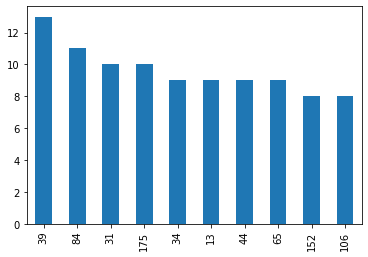

In [9]:
# Análise das compras em geral

#Plotando o número de compras total;

print (df_sem_duplicacoes['Nome do Item'].value_counts().head(10).plot(kind='bar'))

print (df_sem_duplicacoes['Item ID'].value_counts().head(10).plot(kind='bar'))



In [10]:
total_itens = df_sem_duplicacoes['Nome do Item'].drop_duplicates()
total_itens = total_itens.count()

print ('Número total de items exclusivos: ',total_itens)

preco_medio = df_sem_duplicacoes['Valor']
preco_medio = np.mean(preco_medio)

print("O preço médio é %.2f" % preco_medio)

numero_compras = df_sem_duplicacoes['Nome do Item'].count()
print('O número total de compras é: ', numero_compras)

rendimento = df_sem_duplicacoes['Valor'].sum()

print('Rendimento total = ', rendimento)


Número total de items exclusivos:  179
O preço médio é 2.93
O número total de compras é:  777
Rendimento total =  2279.32


In [11]:
# Informações Demográficas Por Gênero:


# Dando um check na tabela;

tabela = df_sem_duplicacoes.groupby('Sexo').count()
print('A tabela geral: \n', tabela.Valor)
print('\n')

# Porcentagem e contagem de compradores masculinos

#Filtro a tabela df_sem_duplicacoes pelo sexo = masculino
compradores_masculino = df_sem_duplicacoes[df_sem_duplicacoes.Sexo == 'Masculino']


# Exibo apenas a contagem da coluna Sexo

#print ('Contagem', compradores_masculino.Sexo.value_counts())
#print('\n')

print ('Contagem de compradores masculinos: ',compradores_masculino.Sexo.count())


## Outra maneira de filtrar os dados;
#total_consumidores = df_sem_duplicacoes['Sexo']
#total_consumidores[total_consumidores == 'Masculino'].count()

# Porcentagem de compradores masculinos


porc_compradores_masculinos = (compradores_masculino.Sexo.count() / total_consumidores)*100
print('A porcentagem de Compradores masculinos é de: %.2f%% \n' %porc_compradores_masculinos)

# Total Compradores femininos e Porcentagem 

compradores_femininos = df_sem_duplicacoes[df_sem_duplicacoes.Sexo == 'Feminino']
print ('Contagem de compradores femininos', compradores_femininos.Sexo.count())

porc_compradores_femininos = (compradores_femininos.Sexo.count()/total_consumidores)*100
print ('A porcentagem de Compradores femininos é de: %.2f%%' %porc_compradores_femininos)

print('\n')
# Total e porcentagem de compradores Outro/não divulgados

compradores_outros = df_sem_duplicacoes[df_sem_duplicacoes.Sexo == 'Outro / Não Divulgado']
print ('Contagem dos compradores não divulgados: ', compradores_outros.Sexo.count())

porc_compradores_outros = (compradores_outros.Sexo.count()/total_consumidores )*100
print ('A porcentagem de Compradores não identificados é de: %.2f%%' %porc_compradores_outros)


A tabela geral: 
 Sexo
Feminino                 135
Masculino                631
Outro / Não Divulgado     11
Name: Valor, dtype: int64


Contagem de compradores masculinos:  631
A porcentagem de Compradores masculinos é de: 81.21% 

Contagem de compradores femininos 135
A porcentagem de Compradores femininos é de: 17.37%


Contagem dos compradores não divulgados:  11
A porcentagem de Compradores não identificados é de: 1.42%


In [131]:
## Análise de Compras por Gênero;

########## Masculino ########

print ('### Masculino ###')
# Número de compras total;

print ('O número total de compras para o gênero masculino é:',compradores_masculino.Login.count())

# Preço médio de compra;

print('O preço médio de compra é: %.2f'%np.mean(compradores_masculino.Valor))

#Valor total Compras;

print ('O valor total das compras do gênero masculino é: %.2f' %compradores_masculino.Valor.sum())

# Faixa etária;

mas_faixa_etaria = compradores_masculino.groupby('Idade')

print ('\n O número de compras masculino por idade é:\n ',mas_faixa_etaria.Idade.count())

### FEMININO #######

print ('\n')
print ('### Feminino ###\n')

# Número de compras total;

print ('O número de compradores total para o gênero feminino é: ',compradores_femininos.Login.count())

# Preço médio de compras;

print ('O valor médio de compras para o gênero feminino é: ',np.median(compradores_femininos.Valor))

# Valor total de compras;

print ('O valor total de compras para o gênero feminino é: ',compradores_femininos.Valor.sum())

# Compras por Idade:

fem_faixa_etaria = compradores_femininos.groupby('Idade')
print ('\n O número de compras feminono por idade é:\n ',fem_faixa_etaria.Idade.count())


### Masculino ###
O número total de compras para o gênero masculino é: 631
O preço médio de compra é: 2.95
O valor total das compras do gênero masculino é: 1862.03

 O número de compras masculino por idade é:
  Idade
7     13
8      3
9      5
10     2
11     7
12     4
13     6
14     6
15    43
16    18
17    11
18    18
19    19
20    81
21    37
22    58
23    47
24    61
25    52
26     8
27    11
28     5
29    18
30    16
31    15
32     8
33     7
34     6
35    10
36     7
37     5
38     9
40    12
42     1
43     1
45     1
Name: Idade, dtype: int64


### Feminino ###

O número de compradores total para o gênero feminino é:  135
O valor médio de compras para o gênero feminino é:  2.63
O valor total de compras para o gênero feminino é:  381.55

 O número de compras feminono por idade é:
  Idade
7      5
9      1
10     2
11     2
13     5
15     4
16     5
17     6
18     6
19     3
20    17
21     4
22     9
23    10
24     9
25    14
26     4
27     6
29     3
30     2
31  

In [161]:
## Listar os 5 maiores compradores pelo valor total de compra


### Maiores compradores? ####

maiores_compradores = df_sem_duplicacoes.groupby('Login')
#maiores_compradores.groupby('Login').
print('\nOs maiores compradores em valor: \n\n', maiores_compradores.Valor.sum().sort_values(ascending=False))


### Maiores por número de compras ####

maiores_compras = maiores_compradores.count().sort_values('Valor', ascending=False)


print('\nOs maiores compradores em número de compras\n\n', maiores_compras[['Item ID']])

### Maiores por Preço médio de compras ###

preco_medio = maiores_compradores.Valor.sum()/maiores_compradores['Item ID'].sum()

print('\nO preco médio por login é: \n\n',preco_medio)

### Maiores itens de compras ####


mais_populares = df_sem_duplicacoes.groupby('Nome do Item').count().sort_values('Valor', ascending=False)



print('\nOs maiores itens de compra: \n\n', mais_populares[['Item ID']])




Os maiores compradores em valor: 

 Login
Undirrala66      17.06
Saedue76         13.56
Mindimnya67      12.74
Haellysu29       12.73
Eoda93           11.58
                 ...  
Lassadarsda57     1.03
Lassista97        1.03
Ililsan66         1.03
Alaesu91          1.03
Rarith48          1.03
Name: Valor, Length: 573, dtype: float64

Os maiores compradores em número de compras

              Item ID
Login               
Undirrala66        5
Hailaphos89        4
Qarwen67           4
Mindimnya67        4
Sondastan54        4
...              ...
Ilaesudil92        1
Iduedru67          1
Idaria87           1
Idairin80          1
Zontibe81          1

[573 rows x 1 columns]

O preco médio por login é: 

 Login
Adairialis76    0.055909
Aduephos78      0.019420
Aeduera68       0.019269
Aela49          0.055909
Aela59          0.020159
                  ...   
Yasurra52       0.058148
Yathecal72      0.051457
Yathecal82      0.013539
Zhisrisu83      0.021391
Zontibe81       0.040769
Length:

In [216]:

# Mais populares por contagem de compras; 
contagem_compras = df_sem_duplicacoes.groupby('Item ID')

print('\n Os 5 itens mais populares por contagem de compras de ID do item: \n\n',contagem_compras['Item ID'].count().sort_values(ascending=False).head(5))

contagem_compras2 = df_sem_duplicacoes.groupby('Nome do Item')

print('\n Os 5 itens mais populares por contagem de compras de Nome do Item: \n\n',contagem_compras2['Item ID'].count().sort_values(ascending=False).head(5))

contagem_compras3 = df_sem_duplicacoes.groupby('Login')

print('\n Os 5 itens mais populares por contagem de número de compras: \n\n',contagem_compras3['Item ID'].count().sort_values(ascending=False).head(5))

contagem_compras4 = df_sem_duplicacoes[['Item ID','Nome do Item','Valor']].drop_duplicates()
print('\nOs itens mais caros são: \n\n',contagem_compras4.sort_values('Valor', ascending=False).head(5))

contagem_compras5 = contagem_compras2['Valor'].sum()

print('\n O valor por total de compras: \n\n',contagem_compras5.sort_values(ascending=False).head(5) )




 Os 5 itens mais populares por contagem de compras de ID do item: 

 Item ID
39     11
84     10
31      9
175     9
34      9
Name: Item ID, dtype: int64

 Os 5 itens mais populares por contagem de compras de Nome do Item: 

 Nome do Item
Final Critic                            13
Betrayal, Whisper of Grieving Widows    11
Stormcaller                             10
Arcane Gem                              10
Woeful Adamantite Claymore               9
Name: Item ID, dtype: int64

 Os 5 itens mais populares por contagem de número de compras: 

 Login
Undirrala66    5
Sondastan54    4
Saedue76       4
Qarwen67       4
Hailaphos89    4
Name: Item ID, dtype: int64

Os itens mais caros são: 

      Item ID                              Nome do Item  Valor
50        32                                   Orenmir   4.95
19       177  Winterthorn, Defender of Shifting Worlds   4.89
100      103                            Singed Scalpel   4.87
104      173                       Stormfury Longsword